In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Salary_Data_cleansed.csv")

In [3]:
df.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,companyName_text,job_state,same_state,age_Cmpny,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,48,1,1,0,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,37,1,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,11,1,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,56,1,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,23,1,1,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Emp_Provided_Salary:', 'min_salary', 'max_salary',
       'avg_salary', 'companyName_text', 'job_state', 'same_state',
       'age_Cmpny', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def senioriy(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [6]:
df['job_simple'] = df['Job Title'].apply(title_simplifier)

In [7]:
df['job_simple'].value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
manager              22
machine learning     22
director             14
Name: job_simple, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(senioriy)
df['seniority'].value_counts()

na        519
senior    220
jr          3
Name: seniority, dtype: int64

In [9]:
#fix los angeles state
df['job_state'] =df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
WI     10
IN     10
UT     10
AZ      9
MO      9
AL      8
MI      6
DE      6
GA      6
KY      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
MN      2
ID      2
SC      1
RI      1
Name: job_state, dtype: int64

In [10]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [11]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

In [12]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [13]:
#hourly wage to annual. //multiply 2000(annual working hours) to hourly wage and divide by 1000(since we need the first 2 digits)
#df['min_salary1'] = df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary,axis=1)
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary,axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary *2 if x.hourly==1 else x.max_salary,axis=1)

In [14]:
df[df['hourly']==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [15]:
drop.df['min_salary1'] 

NameError: name 'drop' is not defined

In [16]:
df.drop('min_salary1',axis=1)

KeyError: "['min_salary1'] not found in axis"

In [17]:
df['companyName_text'] = df['companyName_text'].apply(lambda x: x.replace('\n',''))

In [18]:
df['companyName_text']


0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: companyName_text, Length: 742, dtype: object

In [19]:
df.describe()

,Rating,Founded,hourly,Emp_Provided_Salary:,min_salary,max_salary,avg_salary,same_state,age_Cmpny,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,1.0,0.225067,0.237197,0.225067,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.0,0.417908,0.425651,0.417908,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,1.0,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,1.0,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,1.0,0.000000,0.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,1.0,0.000000,0.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.0,1.000000,1.000000,1.000000,10051.000000,4.000000


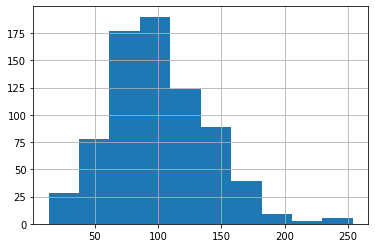

In [20]:
df['avg_salary'].hist()

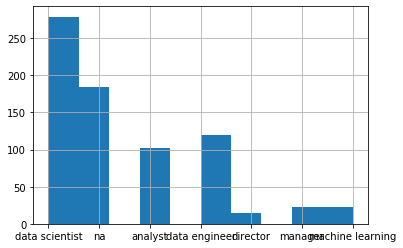

In [21]:
df['job_simple'].hist()

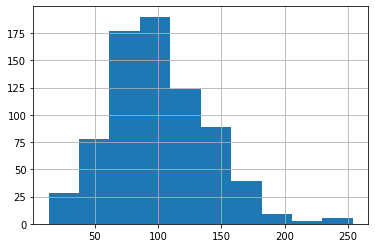

In [22]:
df['avg_salary'].hist()

In [23]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Emp_Provided_Salary:', 'min_salary', 'max_salary',
       'avg_salary', 'companyName_text', 'job_state', 'same_state',
       'age_Cmpny', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simple', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

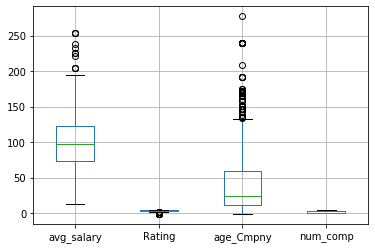

In [24]:
df.boxplot(column=['avg_salary','Rating','age_Cmpny','num_comp'])

In [25]:
df[['age_Cmpny','avg_salary','Rating','desc_len']].corr()

,age_Cmpny,avg_salary,Rating,desc_len
age_Cmpny,1.000000,0.019574,0.023162,0.164188
avg_salary,0.019574,1.000000,0.013492,0.078808
Rating,0.023162,0.013492,1.000000,-0.012281
desc_len,0.164188,0.078808,-0.012281,1.000000


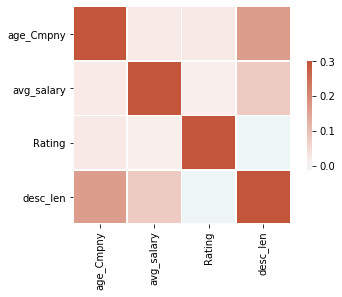

In [26]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(df[['age_Cmpny','avg_salary','Rating','desc_len']].corr(),cmap=cmap,vmax=.3, center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Emp_Provided_Salary:', 'min_salary', 'max_salary',
       'avg_salary', 'companyName_text', 'job_state', 'same_state',
       'age_Cmpny', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simple', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [28]:
df_cat = df[['Salary Estimate','Location','Headquarters','Type of ownership', 'Industry', 'Sector','job_state','python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn','job_simple', 'seniority']]

graph for Salary Estimate: total = 20


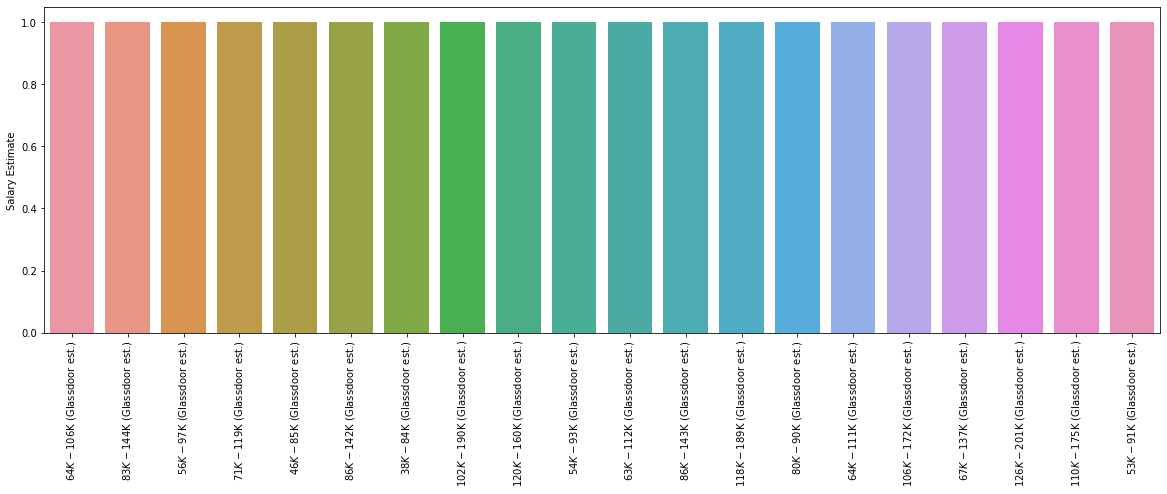

graph for Location: total = 17


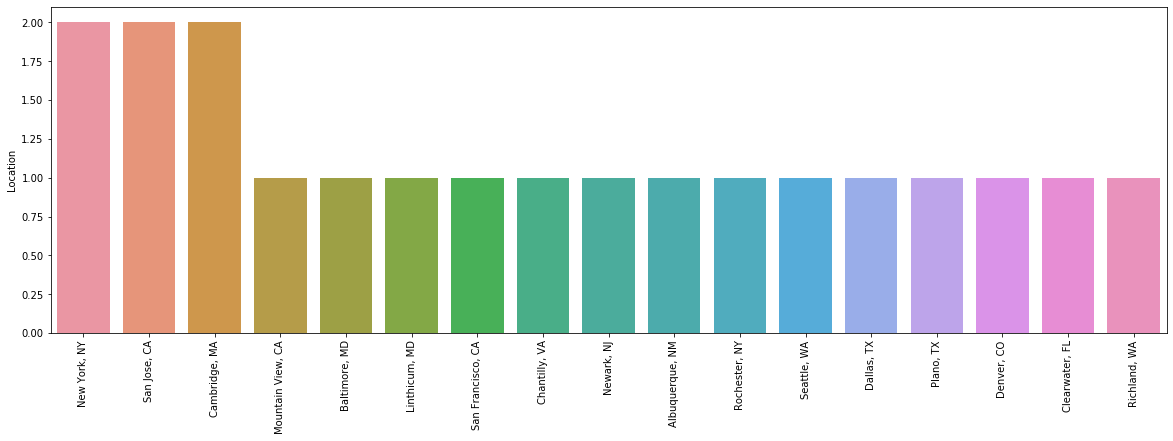

graph for Headquarters: total = 16


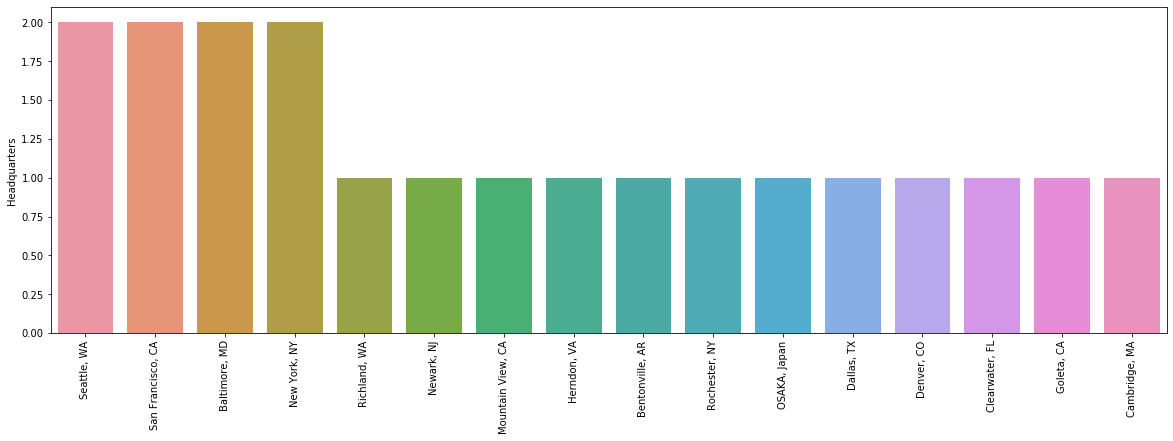

graph for Type of ownership: total = 7


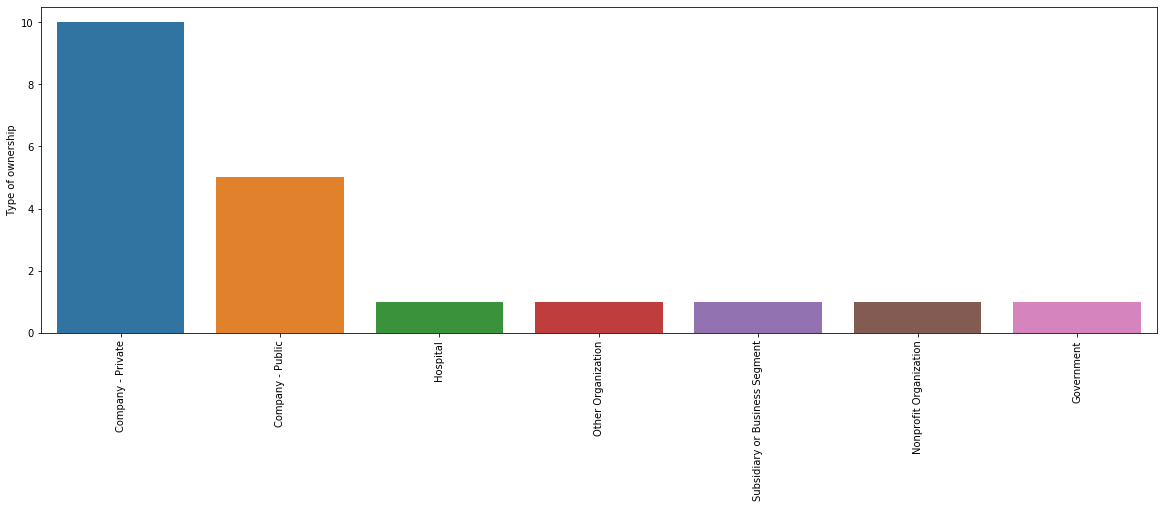

graph for Industry: total = 16


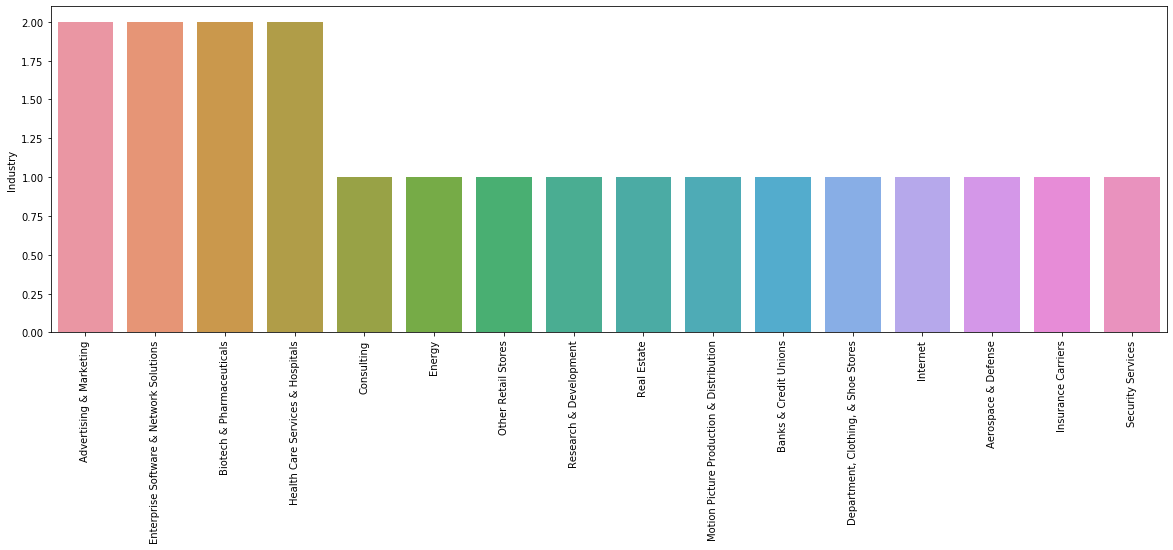

graph for Sector: total = 11


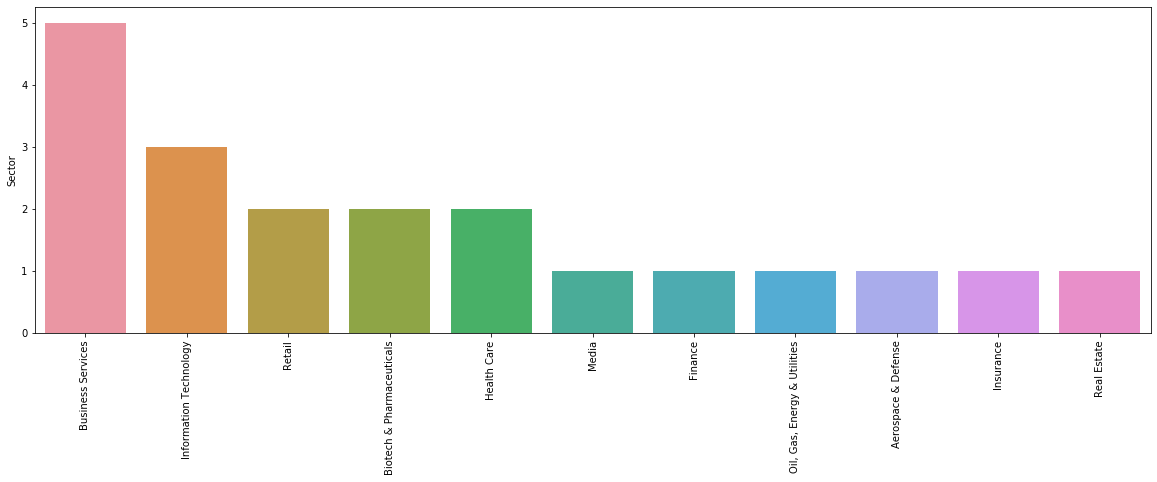

graph for job_state: total = 11


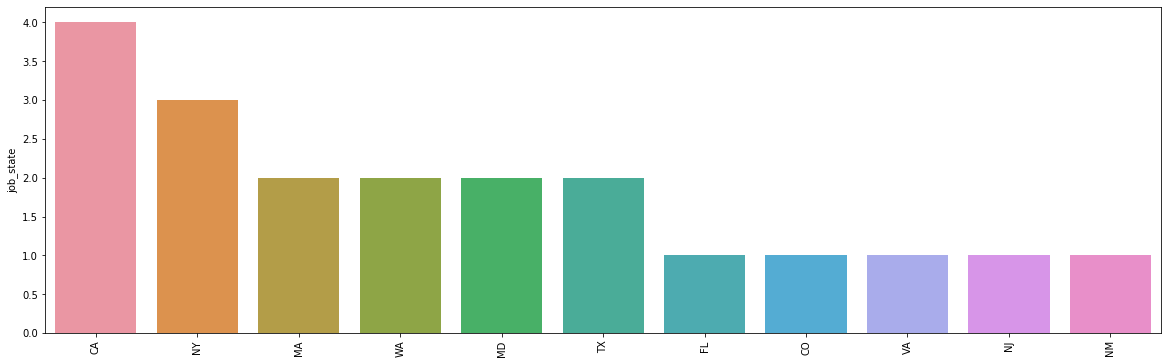

graph for python_yn: total = 2


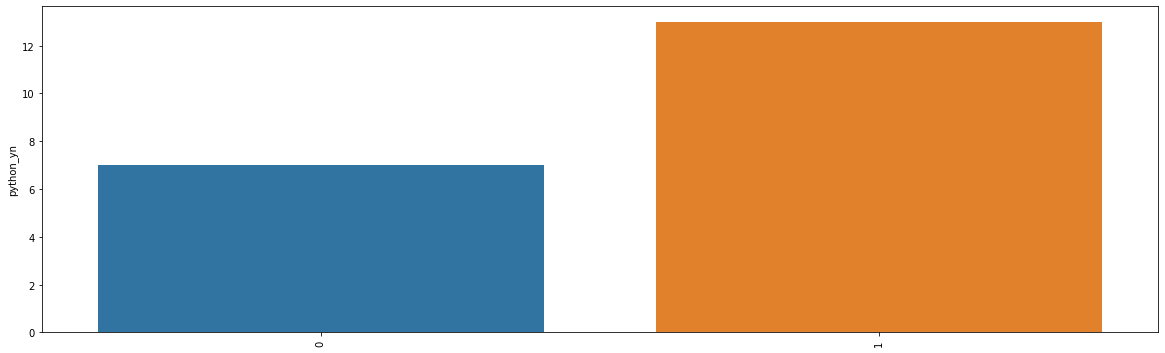

graph for R_yn: total = 1


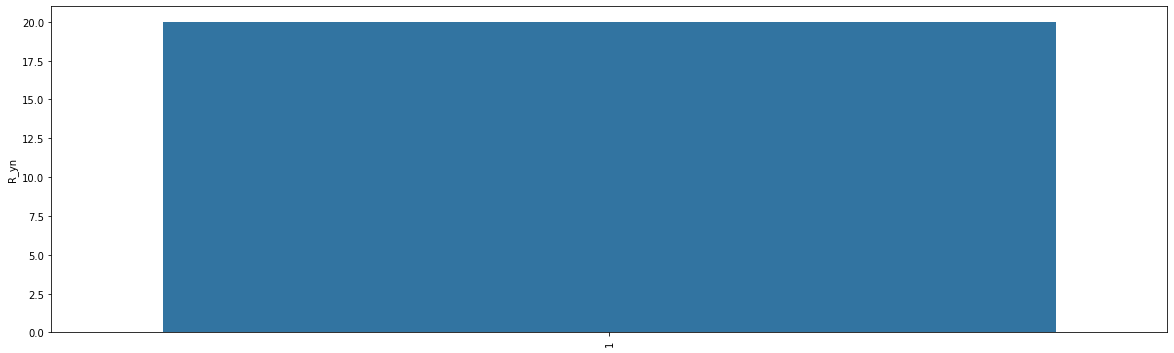

graph for spark_yn: total = 2


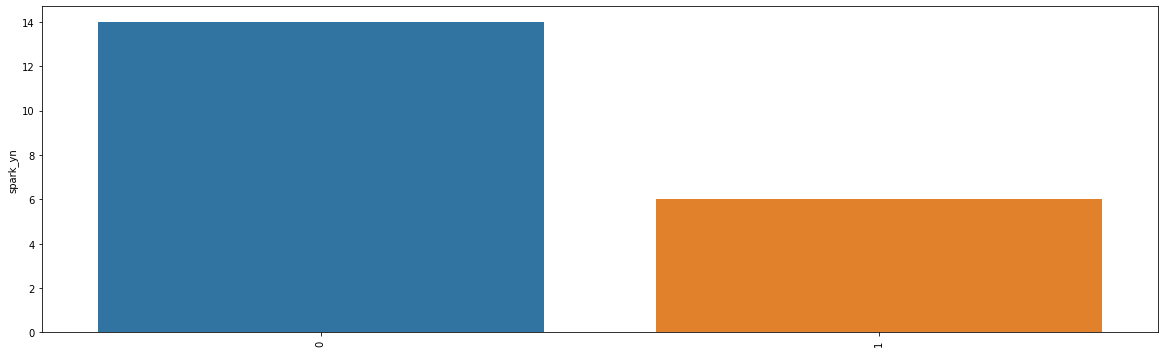

graph for aws_yn: total = 2


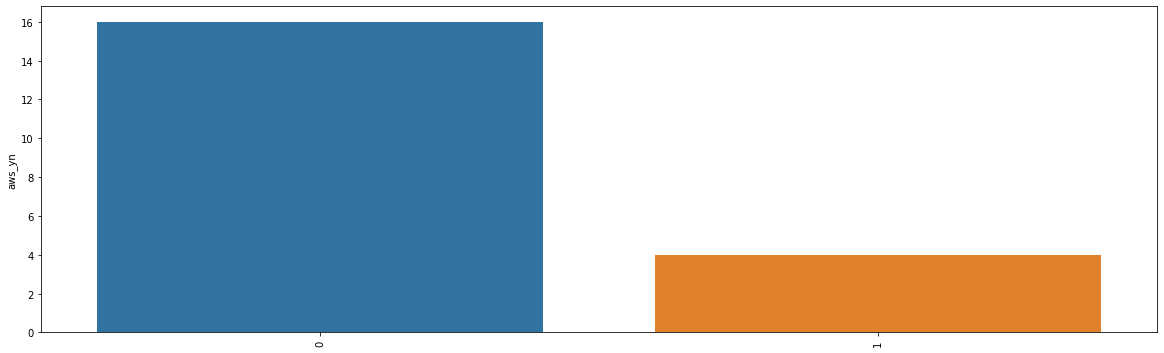

graph for excel_yn: total = 2


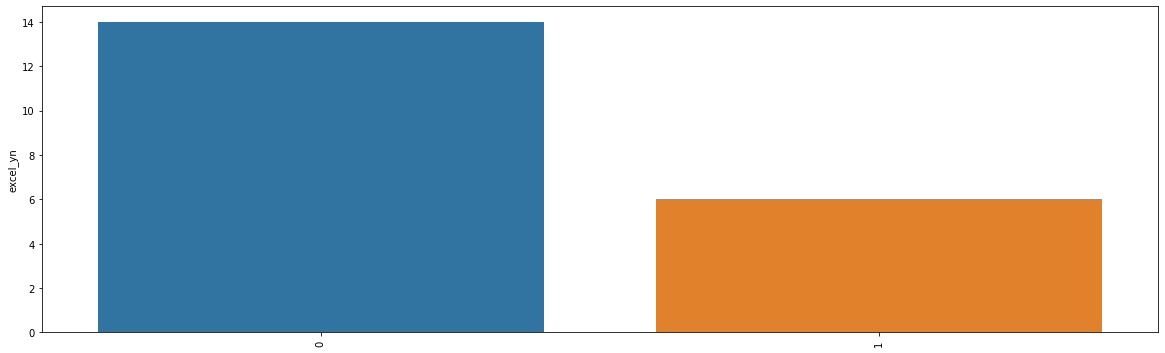

graph for job_simple: total = 4


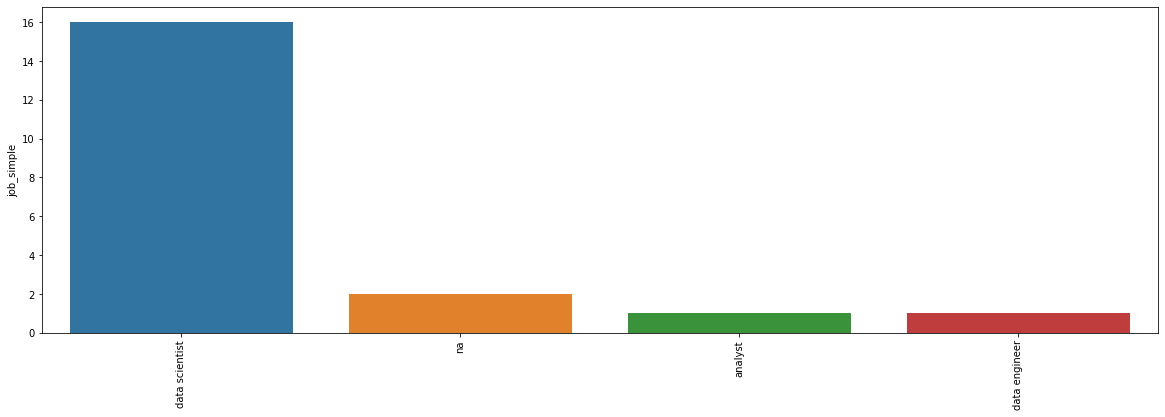

graph for seniority: total = 1


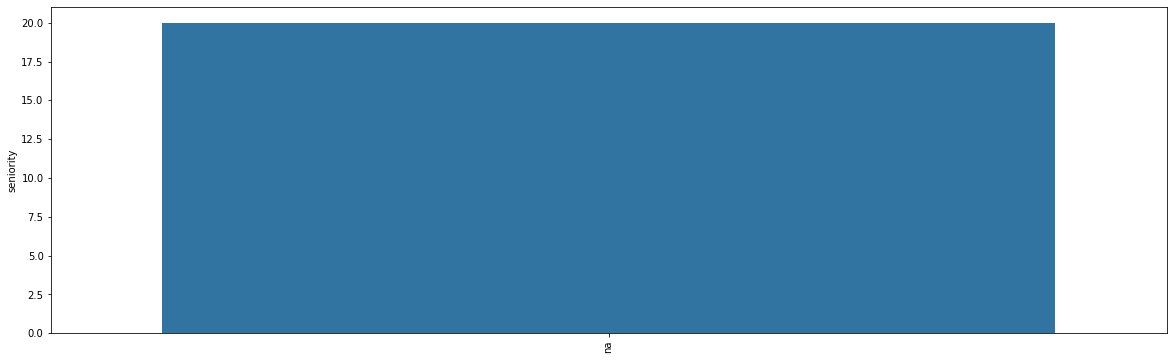

In [29]:
for i in df_cat.columns:
    cat_num = df_cat[i][:20].value_counts()
    print("graph for %s: total = %s" % (i,len(cat_num)))
    chart = plt.figure(figsize=(20,6))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 17


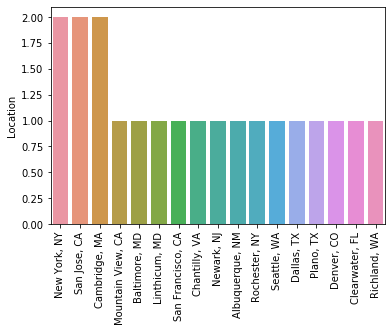

graph for Headquarters: total = 16


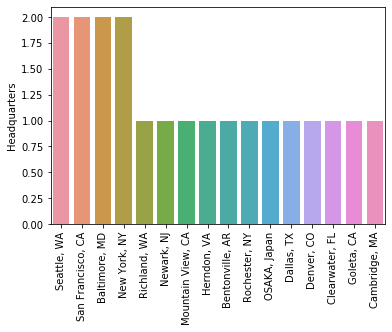

graph for job_state: total = 11


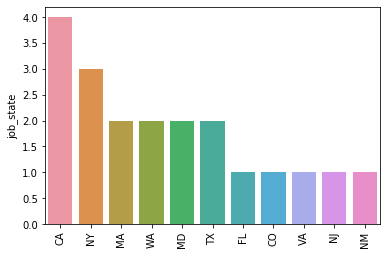

In [30]:
for i in df_cat[['Location','Headquarters','job_state']].columns:
    cat_num = df_cat[i][:20].value_counts()
    print("graph for %s: total = %s" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [31]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Emp_Provided_Salary:', 'min_salary', 'max_salary',
       'avg_salary', 'companyName_text', 'job_state', 'same_state',
       'age_Cmpny', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simple', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [32]:
pd.pivot_table(df, index='job_simple',values='avg_salary')

,avg_salary
job_simple,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning,126.431818
manager,84.022727
na,84.853261


In [33]:
pd.pivot_table(df, index=['job_simple','seniority'],values='avg_salary')

avg_salary
job_simple       seniority            
analyst          jr          53.250000
                 na          61.308219
                 senior      79.092593
data engineer    na          96.701220
                 senior     124.689189
data scientist   jr         106.500000
                 na         107.043011
                 senior     138.956522
director         na         168.607143
machine learning na         119.133333
                 senior     142.071429
manager          na          84.022727
na               na          73.988189
                 senior     109.061404

In [34]:
pd.pivot_table(df, index=['job_state','job_simple','seniority'],values='avg_salary',aggfunc='count').sort_values('job_state',ascending=False)


avg_salary
job_state job_simple     seniority            
WI        na             na                  4
          data scientist senior              1
                         na                  2
          analyst        na                  3
WA        na             na                  1
...                                        ...
AZ        data scientist na                  1
          na             na                  2
AL        na             na                  2
          data engineer  na                  1
          analyst        na                  5

[162 rows x 1 columns]

In [35]:
    pd.pivot_table(df[df.job_simple=='data scientist'],index='job_state',values='avg_salary') .sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [36]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Emp_Provided_Salary:', 'min_salary', 'max_salary',
       'avg_salary', 'companyName_text', 'job_state', 'same_state',
       'age_Cmpny', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simple', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [37]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'Emp_Provided_Salary:', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','avg_salary']]

In [38]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='avg_salary').sort_values('avg_salary',ascending= False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [39]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Emp_Provided_Salary:', 'min_salary', 'max_salary',
       'avg_salary', 'companyName_text', 'job_state', 'same_state',
       'age_Cmpny', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simple', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [40]:
df_pivots= df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'Emp_Provided_Salary:', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','avg_salary']]

In [41]:

for i in df_pivots.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))
    

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

In [42]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

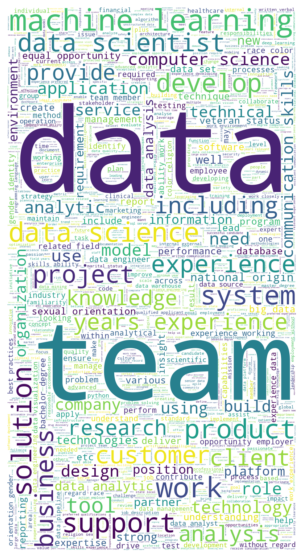

In [44]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()